In [2]:
import numpy as np
import pylab as plt
%matplotlib inline
import gdal

In [3]:
floodmap=gdal.Open('./data/Ambiental_DataJavelin_FloodMap_QA/Instabilities/SEV_Sim_Outputs_TIFF/109yr/SEV1_925_1_109yr.tif')

In [4]:
arr = floodmap.ReadAsArray()

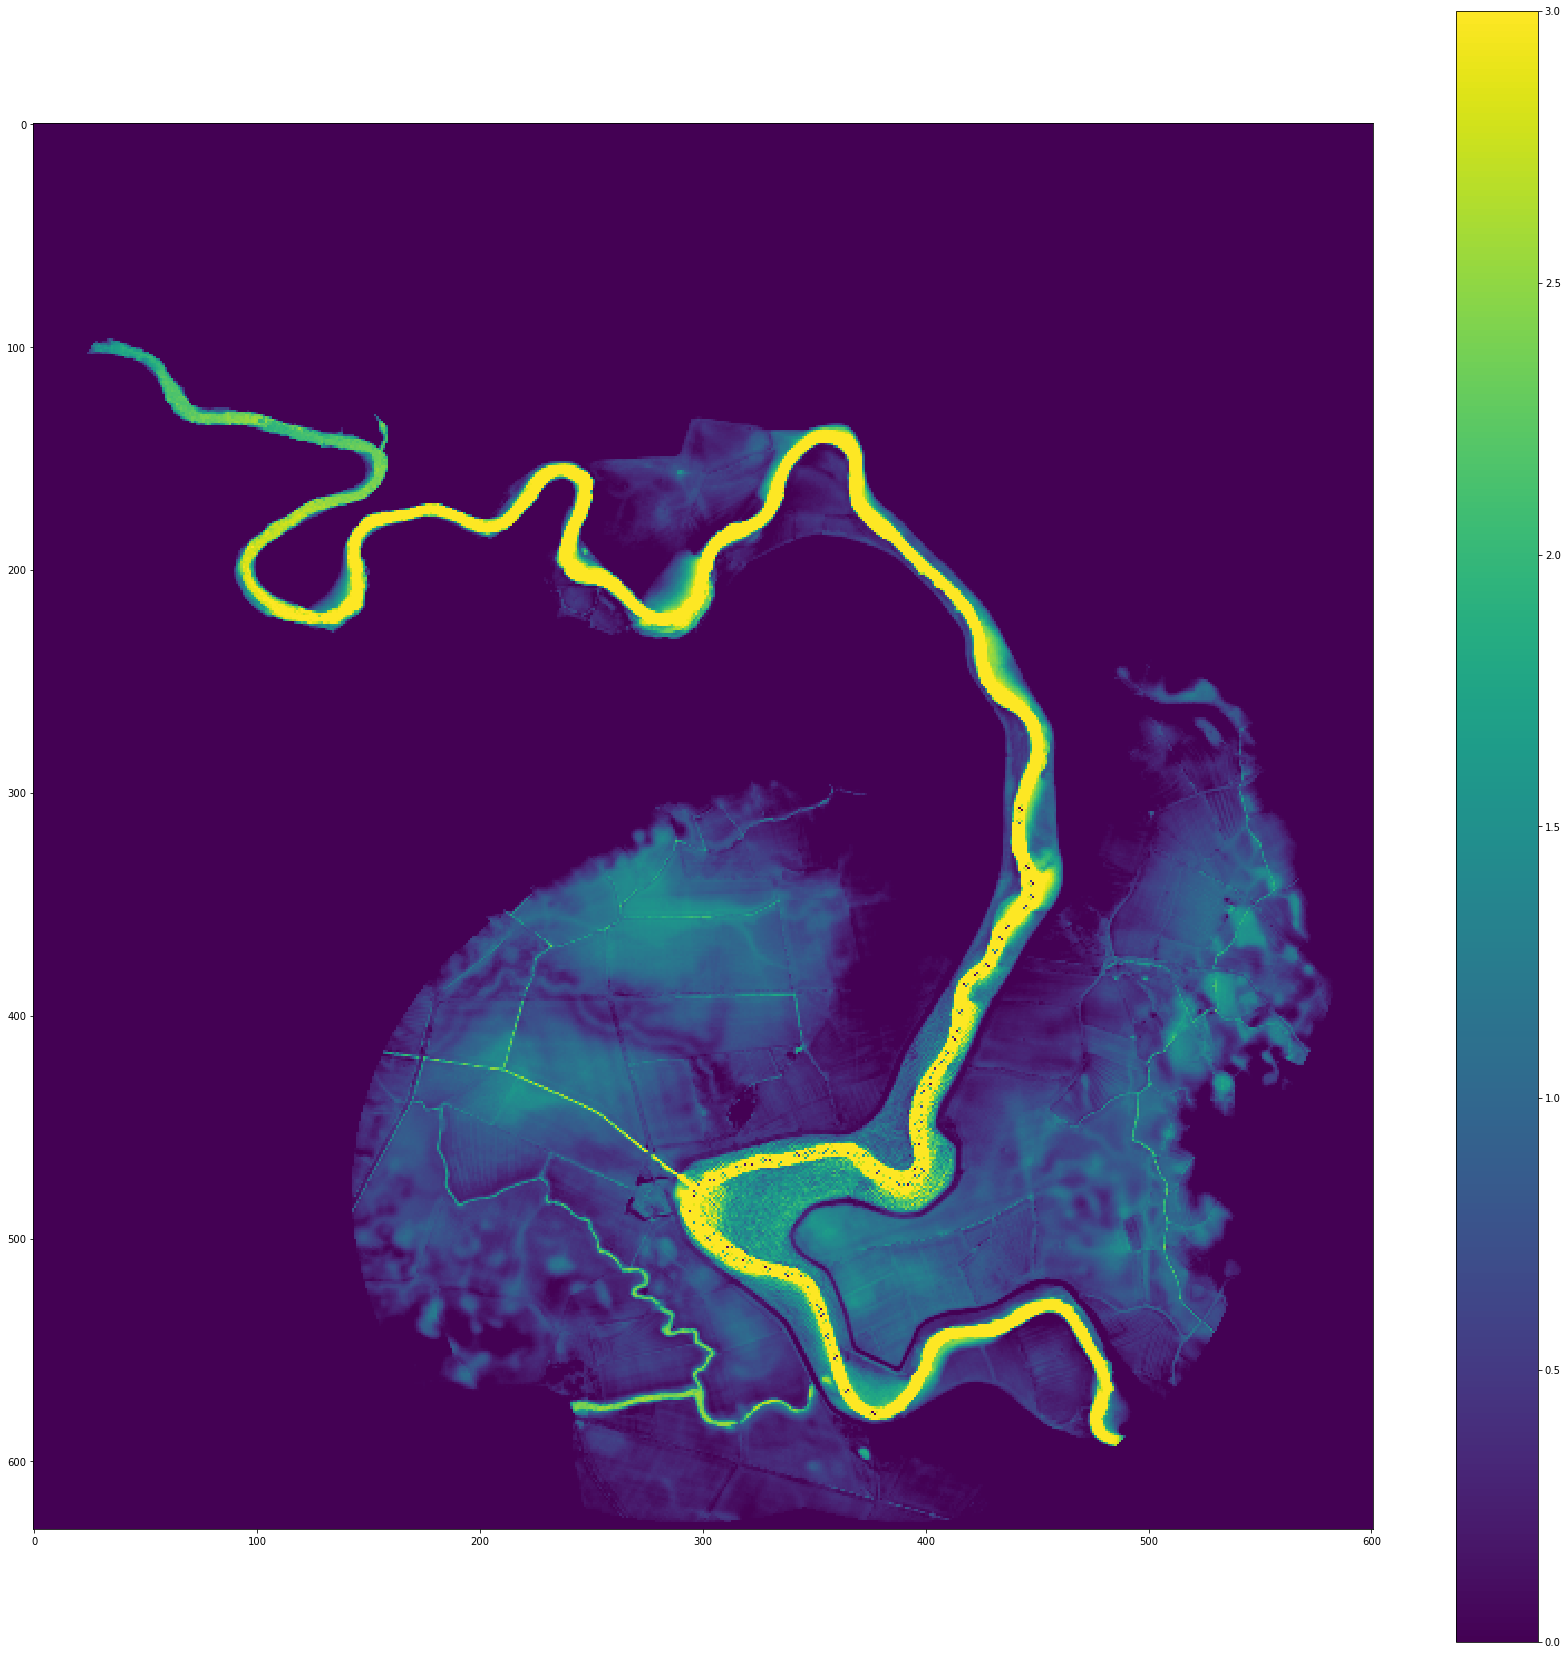

In [94]:
plt.figure(figsize=(30,30))
plt.imshow(arr,vmax=3,vmin=0);
plt.colorbar()

In [95]:
# Set area outside map to 0

In [6]:
arr[arr<-20]=0.0

# List of images with Instabilities
SEV1_1082_1_109yr.img

SEV1_1528_1_109yr.img

SEV1_1537_1_109yr.img

SEV1_1561_1_109yr.img

SEV1_1601_1_109yr.img

SEV1_1624_1_109yr.img

SEV1_2050_1_109yr.img

SEV1_2406_1_109yr.img

SEV1_2436_1_109yr.img

SEV1_2577_1_109yr.img

SEV1_2695_1_109yr.img

SEV1_2696_1_109yr.img

SEV1_2977_1_109yr.img

SEV1_3243_1_109yr.img

SEV1_4070_1_109yr.img

SEV1_925_1_109yr.img

In [88]:
from scipy import fftpack
# Take the fourier transform of the image.
F1 = fftpack.fft2(arr)
 
# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2 = fftpack.fftshift( F1 )
 
# Calculate a 2D power spectrum
psd2D = np.abs( F2 )**2

In [89]:


# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = F2.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 100.0/r
print(keep_fraction)
# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0



0.15847860538827258


/Users/pdh21/anaconda3/envs/new/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


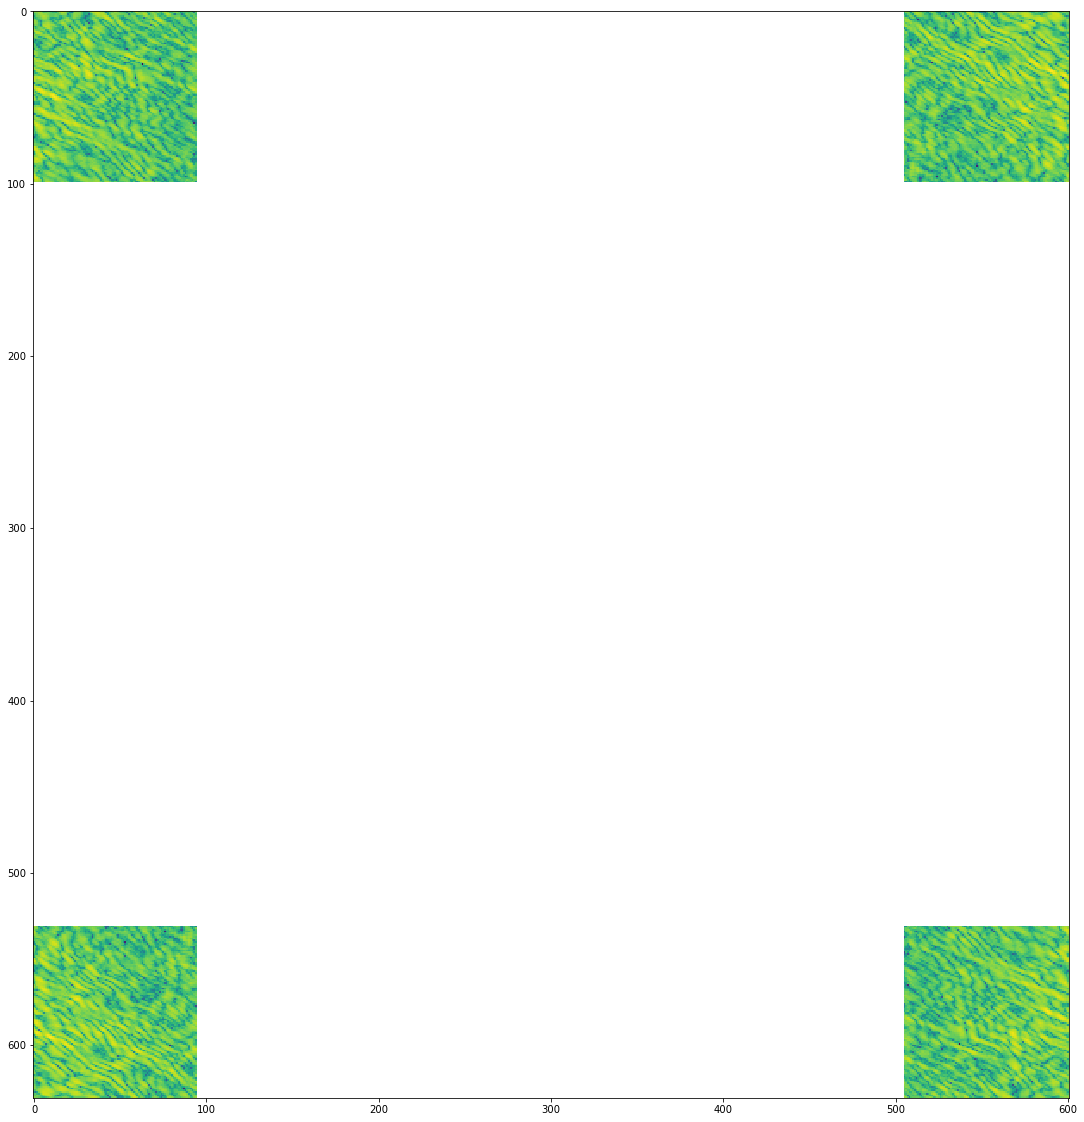

In [90]:
plt.figure(figsize=(20,20))

plt.imshow(np.log10(np.abs(im_fft2)))

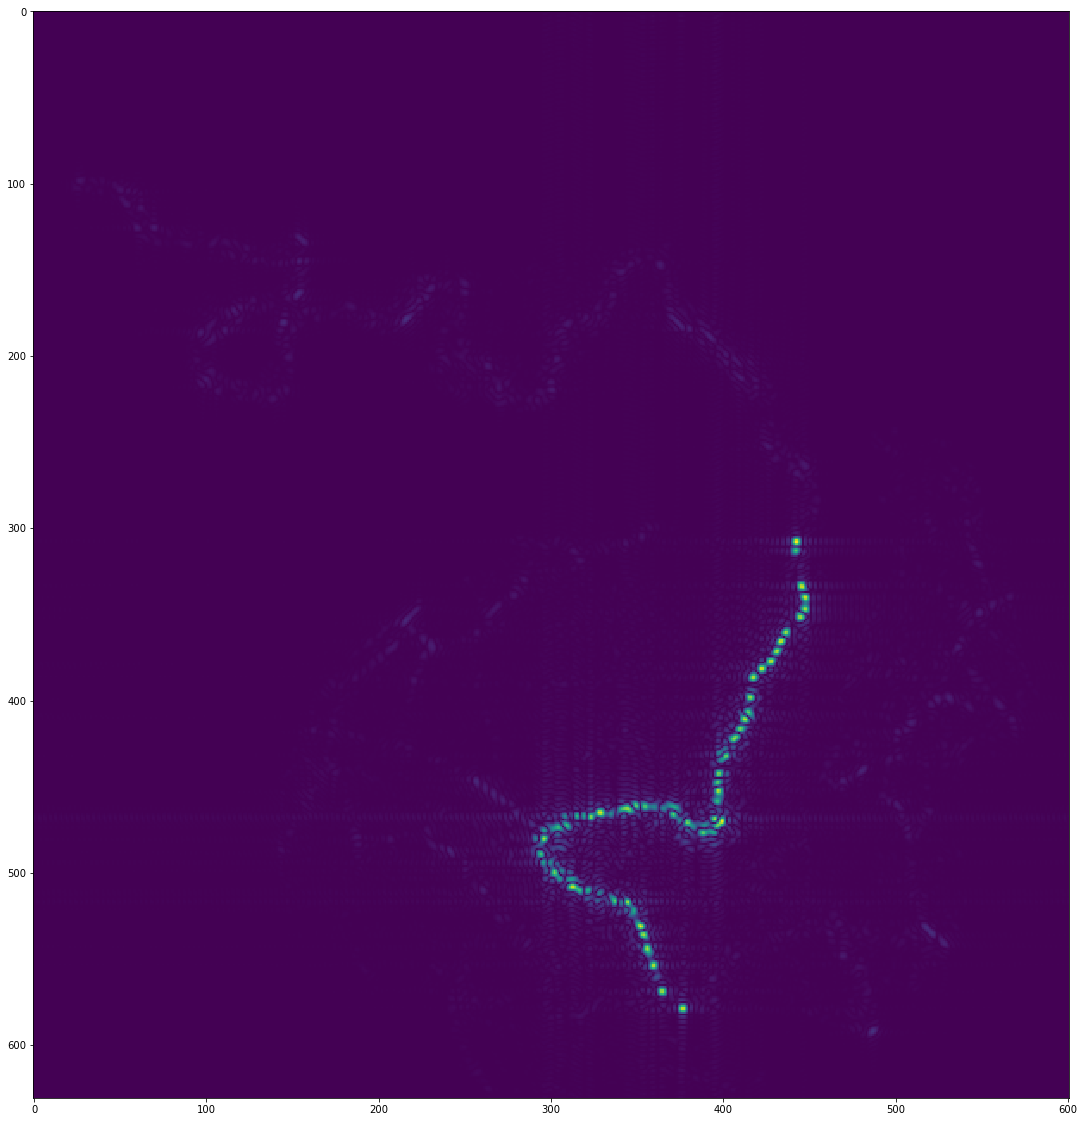

In [91]:
plt.figure(figsize=(20,20))
plt.imshow(np.abs(fftpack.ifft2(fftpack.fftshift(im_fft2))))

/Users/pdh21/anaconda3/envs/new/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


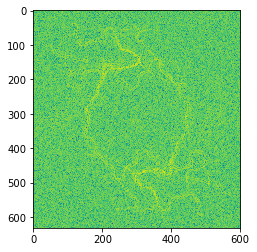

In [92]:
plt.imshow(np.log10(np.abs(fftpack.ifft2(np.angle(F1)))))

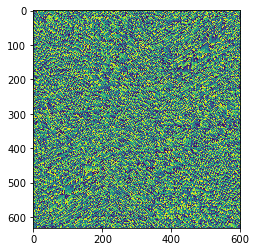

In [20]:
plt.imshow(np.angle(F1))